In [1]:
# Initializing imports.
from pathlib import Path
import os
import requests,io
import pandas as pd
import datetime as dt
import seaborn as sn
import matplotlib.pyplot as plt

# New Libraries that have not been used in class.
import zipfile
import webbrowser

In [2]:
# 
Divvy_Trips_2019_Q1_link = 'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q1.zip'
Divvy_Trips_2019_Q2_link = 'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q2.zip'
Divvy_Trips_2019_Q3_link = 'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q3.zip'
Divvy_Trips_2019_Q4_link = 'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q4.zip'

In [3]:
# 
getfolder1 = requests.get(Divvy_Trips_2019_Q1_link)
getfolder2 = requests.get(Divvy_Trips_2019_Q2_link)
getfolder3 = requests.get(Divvy_Trips_2019_Q3_link)
getfolder4 = requests.get(Divvy_Trips_2019_Q4_link)

In [4]:
#
unzipfolder1 = zipfile.ZipFile(io.BytesIO(getfolder1.content))
unzipfolder2 = zipfile.ZipFile(io.BytesIO(getfolder2.content))
unzipfolder3 = zipfile.ZipFile(io.BytesIO(getfolder3.content))
unzipfolder4 = zipfile.ZipFile(io.BytesIO(getfolder4.content))

In [5]:
#
unzipfolder1.extractall('./Q1/Divvy_Trips_2019_Q1')
unzipfolder2.extractall('./Q2/Divvy_Trips_2019_Q2')
unzipfolder3.extractall('./Q3/Divvy_Trips_2019_Q3')
unzipfolder4.extractall('./Q4/Divvy_Trips_2019_Q4')

In [6]:
# 
os.rename("./Q1/Divvy_Trips_2019_Q1/Divvy_Trips_2019_Q1","./Q1/Divvy_Trips_2019_Q1/Divvy_Trips_2019_Q1.csv")
os.rename("./Q2/Divvy_Trips_2019_Q2/Divvy_Trips_2019_Q2","./Q2/Divvy_Trips_2019_Q2/Divvy_Trips_2019_Q2.csv")

In [7]:
# 
Q1_df = pd.read_csv('./Q1/Divvy_Trips_2019_Q1/Divvy_Trips_2019_Q1.csv')
Q2_df = pd.read_csv('./Q2/Divvy_Trips_2019_Q2/Divvy_Trips_2019_Q2.csv')
Q3_df = pd.read_csv('./Q3/Divvy_Trips_2019_Q3/Divvy_Trips_2019_Q3.csv')
Q4_df = pd.read_csv('./Q4/Divvy_Trips_2019_Q4/Divvy_Trips_2019_Q4.csv')

In [8]:
# 
Q2_df = Q2_df.rename(
    columns={'01 - Rental Details Rental ID' : 'trip_id'
             , '01 - Rental Details Local Start Time' : 'start_time'
             ,'01 - Rental Details Local End Time' : 'end_time'
             ,'01 - Rental Details Bike ID' : 'bikeid'
             ,'01 - Rental Details Duration In Seconds Uncapped' : 'tripduration'
             ,'03 - Rental Start Station ID' : 'from_station_id'
             ,'03 - Rental Start Station Name' : 'from_station_name'
             ,'02 - Rental End Station ID' : 'to_station_id'
             ,'02 - Rental End Station Name' : 'to_station_name'
             ,'User Type' : 'usertype'
             ,'Member Gender' : 'gender'
             ,'05 - Member Details Member Birthday Year' : 'birthyear'}
)

In [9]:
# 
joined_Divvy_data = Q1_df.append([Q2_df,Q3_df,Q4_df], ignore_index=True, sort=False)

In [10]:
# 
joined_Divvy_data.drop(columns=[
    'trip_id'
    , 'end_time', 'bikeid'
    , 'from_station_id'
    , 'from_station_name'
    , 'to_station_id'
    ,'to_station_name'], inplace=True)

In [11]:
# 
joined_Divvy_data_split = joined_Divvy_data['start_time'].str.split(" ", n = 1, expand = True)

In [12]:
# 
joined_Divvy_data_split = joined_Divvy_data_split.rename(columns={0:'Date'})

In [13]:
# 
joined_Divvy_data_split.drop(columns=[1], inplace=True)

In [14]:
# 
joined_Divvy_data_split['Date']=pd.to_datetime(joined_Divvy_data_split.Date)

In [15]:
# 
joined_Divvy_data_split['Date']=joined_Divvy_data_split['Date'].dt.strftime('%m/%d/%Y')

In [16]:
# 
joined_Divvy_data_all = pd.concat([joined_Divvy_data, joined_Divvy_data_split], axis="columns", join="inner")

In [17]:
# 
joined_Divvy_data_all.drop(columns=['start_time'], inplace=True)

In [18]:
# 
joined_Divvy_data_all = joined_Divvy_data_all.rename(columns={'usertype':'User_Type', 'tripduration':'Trip_Duration_min', 'gender':'Gender', 'birthyear':'Birth_Year'})

In [19]:
# Cleansing nulls from Joined Dataframe by replacing NAN values with empty strings.
Full_Divvy_data = joined_Divvy_data_all.fillna("")

In [20]:
# 
Full_Divvy_data = Full_Divvy_data[['Date', 'User_Type', 'Trip_Duration_min', 'Gender', 'Birth_Year']]
Full_Divvy_data.head()

,Date,User_Type,Trip_Duration_min,Gender,Birth_Year
0,01/01/2019,Subscriber,390.0,Male,1989.0
1,01/01/2019,Subscriber,441.0,Female,1990.0
2,01/01/2019,Subscriber,829.0,Female,1994.0
3,01/01/2019,Subscriber,"1,783.0",Male,1993.0
4,01/01/2019,Subscriber,364.0,Male,1994.0


In [29]:
# 
Total_2019_Users = joined_Divvy_data_all.groupby('Date').User_Type.count().to_frame().rename(columns={'User_Type':'Total_2019_Users'}).reset_index()
Total_2019_Users.head()

,Date,Total_2019_Users
0,01/01/2019,1312
1,01/02/2019,4170
2,01/03/2019,5618
3,01/04/2019,6793
4,01/05/2019,6179


In [30]:
# 
Weeks_2019 = pd.date_range('2018-12-31', '2019-12-30', freq='D').to_series()

In [31]:
# 
Weeks_2019 = Weeks_2019.dt.isocalendar().week

In [32]:
# 
Weeks_2019_df = Weeks_2019.to_frame().reset_index().drop(columns=['index']).rename(columns={'week':'Week'})

In [33]:
# 
Weeks_2019_df.iloc[[364],['Week']]=53

In [34]:
# 
Weeks_2019_df.loc[len(Weeks_2019_df.index)]=53

In [35]:
# 
Weeks_2019_df = Weeks_2019_df.drop(labels=0, axis=0)

In [36]:
# 
Weeks_2019_df = Weeks_2019_df.reset_index().drop(columns=['index'])

In [37]:
# 
Weekly_df = pd.concat([Weeks_2019_df, Total_2019_Users], axis="columns", join="inner")
Weekly_df

,Week,Date,Total_2019_Users
0,1,01/01/2019,1312
1,1,01/02/2019,4170
2,1,01/03/2019,5618
3,1,01/04/2019,6793
4,1,01/05/2019,6179
...,...,...,...
360,52,12/27/2019,3981
361,52,12/28/2019,2768
362,52,12/29/2019,3902
363,53,12/30/2019,3308


In [38]:
# 
Weekly_Divvy_Users_df = Weekly_df.groupby('Week').Total_2019_Users.sum().reset_index()

In [39]:
# 
Weekly_Divvy_Users_df

,Week,Total_2019_Users
0,1,27749
1,2,30930
2,3,28005
3,4,13994
4,5,8871
5,6,26529
6,7,22820
7,8,23143
8,9,26498
9,10,24766


In [40]:
# 
xls = pd.ExcelFile('https://www.eia.gov/dnav/pet/xls/PET_PRI_GND_DCUS_YORD_W.xls')
retail_gas_df = pd.read_excel(xls, 'Data 1')

In [41]:
# 
cols = [2, 3, 4, 5, 6, 7, 8]

In [42]:
# 
retail_gas_df.drop(retail_gas_df.columns[cols], axis=1, inplace=True)

In [43]:
# 
retail_gas_df = retail_gas_df.drop(labels=0, axis=0).reset_index().drop(columns=['index'])

In [44]:
# 
row_x = range(1, 970, 1)
retail_gas_df = retail_gas_df.drop(retail_gas_df.index[[row_x]]).reset_index().drop(columns=['index'])

C:\Users\Sal\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [45]:
# 
row_y = range(54, 129, 1)
retail_gas_df = retail_gas_df.drop(retail_gas_df.index[[row_y]]).reset_index().drop(columns=['index'])

In [46]:
# 
retail_gas_df = retail_gas_df.drop(
    labels=[0,54], axis=0).reset_index().drop(
    columns=['index']).rename(
    columns={'Back to Contents':'Date'
             , 'Data 1: Chicago Gasoline and Diesel Retail Prices':'Retail_Gas_Prices'
            })

In [47]:
# 
retail_gas_df['Date']=pd.to_datetime(retail_gas_df.Date)

In [48]:
#
retail_gas_df['Retail_Gas_Prices'] = retail_gas_df['Retail_Gas_Prices'].astype(float)

In [49]:
# 
retail_gas_df.round({'Retail_Gas_Prices':2})

,Date,Retail_Gas_Prices
0,2018-12-31,2.24
1,2019-01-07,2.24
2,2019-01-14,2.27
3,2019-01-21,2.30
4,2019-01-28,2.26
5,2019-02-04,2.35
6,2019-02-11,2.41
7,2019-02-18,2.48
8,2019-02-25,2.61
9,2019-03-04,2.58


In [ ]:
# 
## Date Range: 12/17/18 - 12/30/19
webbrowser.open_new('https://www.investing.com/commodities/crude-oil-historical-data)

In [50]:
# 
futures_crude_oil_prices = pd.read_clipboard()

In [51]:
# 
futures_crude_oil_prices = futures_crude_oil_prices.reset_index().rename(
    columns={'Dec 23, 2018' : 'Date','45.33': 'Crude_Oil_Price'}).drop(columns=['index','45.45','47.00','42.36','2.34M','-0.57%'])

In [52]:
# 
futures_crude_oil_prices['Date']=pd.to_datetime(retail_gas_df.Date)

In [53]:
futures_crude_oil_prices

,Date,Crude_Oil_Price
0,2018-12-31,47.96
1,2019-01-07,51.59
2,2019-01-14,53.80
3,2019-01-21,53.69
4,2019-01-28,55.26
5,2019-02-04,52.72
6,2019-02-11,55.59
7,2019-02-18,57.26
8,2019-02-25,55.80
9,2019-03-04,56.07


In [54]:
# 
file_path = Path('OHAREWEATHERDATA_2019.csv')
chi_weather = pd.read_csv('OHAREWEATHERDATA_2019.csv', infer_datetime_format = True)

In [55]:
# 
chi_weather=chi_weather.drop(columns = ['STATION','NAME','AWND', 'PRCP', 'SNOW','SNWD','TMAX','TMIN','WDF2', 'WDF5','WSF2', 'WSF5', 'WT01', 'WT02', 'WT03','WT04','WT05','WT06','WT08','WT09'])

In [56]:
# 
chi_weather['DATE']=pd.to_datetime(chi_weather["DATE"])

In [57]:
# 
weeks_2019_weather = pd.date_range('2019-1-1', '2019-12-31', freq = "D").to_series()

In [58]:
# 
weeks_2019_weather = weeks_2019_weather.dt.week

<ipython-input-58-5ec77a16ac37>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weeks_2019_weather = weeks_2019_weather.dt.week


In [59]:
# 
Weeks_2019_df = weeks_2019_weather.to_frame().reset_index().drop(columns=['index']).rename(columns={'week':'Week'})

In [60]:
# 
new_names = ['Week']
Weeks_2019_df.columns = new_names

In [61]:
# 
Weeks_2019_df.iloc[[363],0]=53

In [62]:
# 
Weeks_2019_df.iloc[[364],0]=53

In [63]:
# 
joined_weather_n_weeks_df = pd.concat([Weeks_2019_df,chi_weather], axis="columns", join="inner")

In [64]:
# 
joined_weather_n_weeks_df = joined_weather_n_weeks_df.groupby('Week').TAVG.mean().to_frame().rename(columns={'TAVG':'Avg_Temp'}).reset_index().round().astype(int)

In [65]:
joined_weather_n_weeks_df

,Week,Avg_Temp
0,1,34
1,2,30
2,3,26
3,4,12
4,5,10
5,6,27
6,7,26
7,8,30
8,9,21
9,10,22


In [66]:
# 
webbrowser.open_new('https://www.baseball-almanac.com/teamstats/schedule.php?y=2019&t=CHN')

True

In [67]:
# 
Cubs_Games_2019 = pd.read_clipboard()

In [68]:
# 
Cubs_Games_2019.drop(columns = ['Game','Score', 'Decision', 'Record'], inplace = True)

In [69]:
# 
Cubs_Home_Games_2019 = Cubs_Games_2019[Cubs_Games_2019.Opponent.str.contains('vs', regex=False)]

In [70]:
# 
Cubs_Home_Games_2019['Date / Box Score'] = pd.to_datetime(Cubs_Home_Games_2019['Date / Box Score'])

<ipython-input-70-5f064a941b0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cubs_Home_Games_2019['Date / Box Score'] = pd.to_datetime(Cubs_Home_Games_2019['Date / Box Score'])


In [71]:
# 
Week_of_Cubs_Game = Cubs_Home_Games_2019['Date / Box Score'].dt.week.to_frame()

<ipython-input-71-3fa3d1885630>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Week_of_Cubs_Game = Cubs_Home_Games_2019['Date / Box Score'].dt.week.to_frame()


In [72]:
# 
Cubs_Weekly_Home_Games = pd.concat([Week_of_Cubs_Game, Cubs_Home_Games_2019], axis = 'columns', join = 'inner')

In [73]:
# 
columns = ['Week', 'No_Cubs_Games', 'Opponent']
Cubs_Weekly_Home_Games.columns = columns

In [74]:
# 
Cubs_Weekly_Home_Games = Cubs_Weekly_Home_Games.groupby(['Week'], as_index=False).count().sort_values(by=['Week'])

In [75]:
# 
Cubs_2019_Home_Games = Cubs_Weekly_Home_Games.rename(columns={'Date / Box Score':'No_Cubs_Games'}).drop(columns=['Opponent'])

In [76]:
Cubs_2019_Home_Games

,Week,No_Cubs_Games
0,15,5
1,16,3
2,17,3
3,18,3
4,19,7
5,21,7
6,23,7
7,25,6
8,26,4
9,28,3


In [77]:
# 
webbrowser.open_new_tab('https://www.baseball-almanac.com/teamstats/schedule.php?y=2019&t=CHA')

True

In [78]:
# 
Sox_Games_2019 = pd.read_clipboard()

In [79]:
# 
Sox_Games_2019.drop(columns = ['Game','Score', 'Decision', 'Record'], inplace = True)

In [80]:
# 
Sox_Home_Games_2019 = Sox_Games_2019[Sox_Games_2019.Opponent.str.contains('vs', regex=False)]

In [81]:
# 
Sox_Home_Games_2019['Date / Box Score'] = pd.to_datetime(Sox_Home_Games_2019['Date / Box Score'])

<ipython-input-81-99c6742a8dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sox_Home_Games_2019['Date / Box Score'] = pd.to_datetime(Sox_Home_Games_2019['Date / Box Score'])


In [82]:
# 
Week_of_Sox_Game = Sox_Home_Games_2019['Date / Box Score'].dt.week.to_frame()

<ipython-input-82-980766e1580f>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Week_of_Sox_Game = Sox_Home_Games_2019['Date / Box Score'].dt.week.to_frame()


In [83]:
# 
Sox_Weekly_Home_Games = pd.concat([Week_of_Sox_Game, Sox_Home_Games_2019], axis = 'columns', join = 'inner')

In [84]:
# 
columns = ['Week', 'No_Sox_Games', 'Opponent']
Sox_Weekly_Home_Games.columns = columns

In [85]:
# 
Sox_Weekly_Home_Games = Sox_Weekly_Home_Games.groupby(['Week'], as_index=False).count().sort_values(by=['Week'])

In [86]:
# 
Sox_2019_Home_Games = Sox_Weekly_Home_Games.rename(columns={'Date / Box Score':'No_Sox_Games'}).drop(columns=['Opponent'])

In [87]:
Sox_2019_Home_Games

,Week,No_Sox_Games
0,14,3
1,15,3
2,16,3
3,17,2
4,18,7
5,20,6
6,22,7
7,24,6
8,26,3
9,27,5


In [88]:
# 
file_path = Path('google_trend_Divvy_searches_2019.csv')
google_trend_Divvy_searches_2019 = pd.read_csv('google_trend_Divvy_searches_2019.csv', infer_datetime_format = True)

In [89]:
# 
google_trend_Divvy_searches_2019 = google_trend_Divvy_searches_2019.reset_index().rename(columns={'index':'Weeks'})

In [90]:
# 
google_trend_Divvy_searches_2019 = google_trend_Divvy_searches_2019.drop(google_trend_Divvy_searches_2019.index[[0]]).reset_index()

In [91]:
# 
columns = ['Week', 'Date', 'Divvy_Google_Searches']
google_trend_Divvy_searches_2019.columns = columns

In [92]:
# 
google_trend_Divvy_searches_2019

,Week,Date,Divvy_Google_Searches
0,1,2018-12-30,10
1,2,2019-01-06,9
2,3,2019-01-13,21
3,4,2019-01-20,12
4,5,2019-01-27,12
5,6,2019-02-03,0
6,7,2019-02-10,8
7,8,2019-02-17,4
8,9,2019-02-24,8
9,10,2019-03-03,4


In [93]:
Weekly_Divvy_Users_df

,Week,Total_2019_Users
0,1,27749
1,2,30930
2,3,28005
3,4,13994
4,5,8871
5,6,26529
6,7,22820
7,8,23143
8,9,26498
9,10,24766


In [94]:
retail_gas_df

,Date,Retail_Gas_Prices
0,2018-12-31,2.239
1,2019-01-07,2.237
2,2019-01-14,2.268
3,2019-01-21,2.303
4,2019-01-28,2.255
5,2019-02-04,2.345
6,2019-02-11,2.410
7,2019-02-18,2.477
8,2019-02-25,2.609
9,2019-03-04,2.578


In [95]:
futures_crude_oil_prices

,Date,Crude_Oil_Price
0,2018-12-31,47.96
1,2019-01-07,51.59
2,2019-01-14,53.80
3,2019-01-21,53.69
4,2019-01-28,55.26
5,2019-02-04,52.72
6,2019-02-11,55.59
7,2019-02-18,57.26
8,2019-02-25,55.80
9,2019-03-04,56.07


In [96]:
joined_weather_n_weeks_df

,Week,Avg_Temp
0,1,34
1,2,30
2,3,26
3,4,12
4,5,10
5,6,27
6,7,26
7,8,30
8,9,21
9,10,22


In [97]:
Cubs_2019_Home_Games

,Week,No_Cubs_Games
0,15,5
1,16,3
2,17,3
3,18,3
4,19,7
5,21,7
6,23,7
7,25,6
8,26,4
9,28,3


In [98]:
Sox_2019_Home_Games

,Week,No_Sox_Games
0,14,3
1,15,3
2,16,3
3,17,2
4,18,7
5,20,6
6,22,7
7,24,6
8,26,3
9,27,5


In [99]:
google_trend_Divvy_searches_2019

,Week,Date,Divvy_Google_Searches
0,1,2018-12-30,10
1,2,2019-01-06,9
2,3,2019-01-13,21
3,4,2019-01-20,12
4,5,2019-01-27,12
5,6,2019-02-03,0
6,7,2019-02-10,8
7,8,2019-02-17,4
8,9,2019-02-24,8
9,10,2019-03-03,4


In [100]:
# 
Final_df_01 = pd.merge(Weekly_Divvy_Users_df, joined_weather_n_weeks_df, how='outer', left_on = 'Week', right_on = 'Week')
Final_df_02 = pd.merge(Final_df_01, google_trend_Divvy_searches_2019, how='outer', left_on = 'Week', right_on = 'Week')
Final_df_03 = pd.merge(Cubs_2019_Home_Games, Sox_2019_Home_Games, how='outer', left_on = 'Week', right_on = 'Week')
Final_df_04 = pd.merge(Final_df_01, Final_df_03, how='outer', left_on = 'Week', right_on = 'Week')
Final_df_05 = pd.merge(Final_df_04, google_trend_Divvy_searches_2019, how='outer', left_on = 'Week', right_on = 'Week').drop(columns=['Date'])
Final_df_05

,Week,Total_2019_Users,Avg_Temp,No_Cubs_Games,No_Sox_Games,Divvy_Google_Searches
0,1,27749,34,NaN,NaN,10
1,2,30930,30,NaN,NaN,9
2,3,28005,26,NaN,NaN,21
3,4,13994,12,NaN,NaN,12
4,5,8871,10,NaN,NaN,12
5,6,26529,27,NaN,NaN,0
6,7,22820,26,NaN,NaN,8
7,8,23143,30,NaN,NaN,4
8,9,26498,21,NaN,NaN,8
9,10,24766,22,NaN,NaN,4


In [101]:
# 
Final_df_05['No_Cubs_Games'] = Final_df_05['No_Cubs_Games'].fillna(0).astype(int)
Final_df_05['No_Sox_Games'] = Final_df_05['No_Sox_Games'].fillna(0).astype(int)
Final_df_05

,Week,Total_2019_Users,Avg_Temp,No_Cubs_Games,No_Sox_Games,Divvy_Google_Searches
0,1,27749,34,0,0,10
1,2,30930,30,0,0,9
2,3,28005,26,0,0,21
3,4,13994,12,0,0,12
4,5,8871,10,0,0,12
5,6,26529,27,0,0,0
6,7,22820,26,0,0,8
7,8,23143,30,0,0,4
8,9,26498,21,0,0,8
9,10,24766,22,0,0,4


In [102]:
# 
Final_df_06 = pd.merge(retail_gas_df, futures_crude_oil_prices, how='outer', left_on = 'Date', right_on = 'Date')
Final_df_06['Retail_Gas_Prices'] = Final_df_06['Retail_Gas_Prices'].round(2).astype(float)

In [103]:
Final_df_07 = pd.concat([Final_df_05, Final_df_06], axis = 'columns', join = 'outer').drop(columns=['Week'])

In [104]:
Final_df_07['Divvy_Google_Searches'] = Final_df_07['Divvy_Google_Searches'].astype(int)

In [105]:
# 
Final_df_07 = Final_df_07[['Date'
                           , 'Total_2019_Users'
                           , 'Retail_Gas_Prices'
                           , 'Crude_Oil_Price'
                           , 'Avg_Temp'
                           , 'No_Cubs_Games'
                           , 'No_Sox_Games'
                           , 'Divvy_Google_Searches']]

In [106]:
# 
Final_df_07 = Final_df_07.rename(columns={
    'Total_2019_Users':'# Divvy Riders'
    , 'Retail_Gas_Prices' : 'Avg. Retail Gas Price'
    , 'Crude_Oil_Price' : 'Avg. Futures Crude Oil Price'
    , 'Avg_Temp' : 'Avg. Temp.'
    , 'No_Cubs_Games' : '# Cubs Games'
    , 'No_Sox_Games' : '# Sox Games'
    , 'Divvy_Google_Searches' : '# Divvy Google Searches'})

In [107]:
Final_df_07

,Date,# Divvy Riders,Avg. Retail Gas Price,Avg. Futures Crude Oil Price,Avg. Temp.,# Cubs Games,# Sox Games,# Divvy Google Searches
0,2018-12-31,27749,2.24,47.96,34,0,0,10
1,2019-01-07,30930,2.24,51.59,30,0,0,9
2,2019-01-14,28005,2.27,53.80,26,0,0,21
3,2019-01-21,13994,2.30,53.69,12,0,0,12
4,2019-01-28,8871,2.26,55.26,10,0,0,12
5,2019-02-04,26529,2.35,52.72,27,0,0,0
6,2019-02-11,22820,2.41,55.59,26,0,0,8
7,2019-02-18,23143,2.48,57.26,30,0,0,4
8,2019-02-25,26498,2.61,55.80,21,0,0,8
9,2019-03-04,24766,2.58,56.07,22,0,0,4


In [ ]:
Final_df_07.dtypes

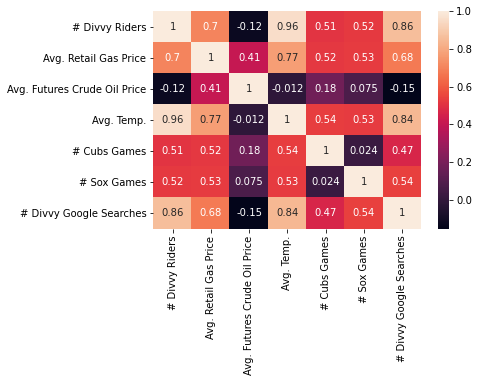

In [108]:
# 
corrMatrix = Final_df_07.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [ ]:
# Add traces
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    secondary_y=True,
)

In [ ]:
# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

In [ ]:
# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

In [ ]:
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()